# Exercício 7 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9559411406517029, 9.124327581584989e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SeventhMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0          1         2          3
0 -0.293662   5.338219 -0.450294  -1.638023
1  1.314015  -3.373279  1.739757  -5.132907
2 -5.573339  -1.736645  9.580465 -12.773851
3 -4.226771  19.799658  2.510886   0.988586
4 -0.834116  -8.201934  4.744578 -11.034271


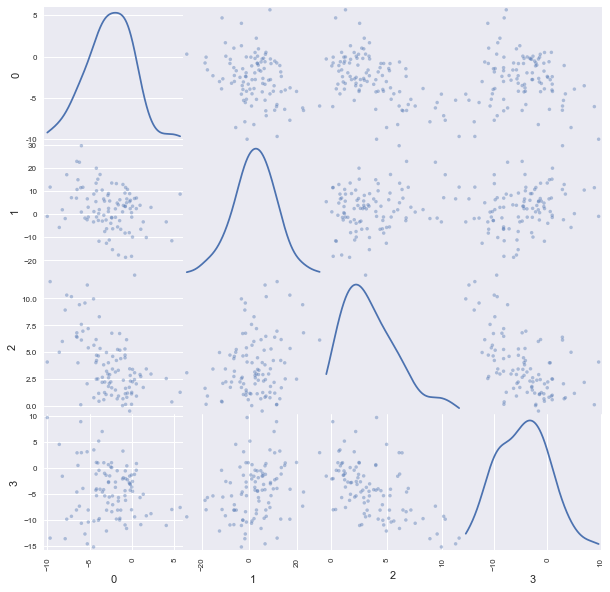

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1571,0.0838,0.9876,0.47921
1,0.1263,0.1473,0.9915,0.78489
2,0.0744,0.4617,0.9286,4.1565e-05
3,0,0.0705,0.9883,0.52801


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.026005268096923828 seconds


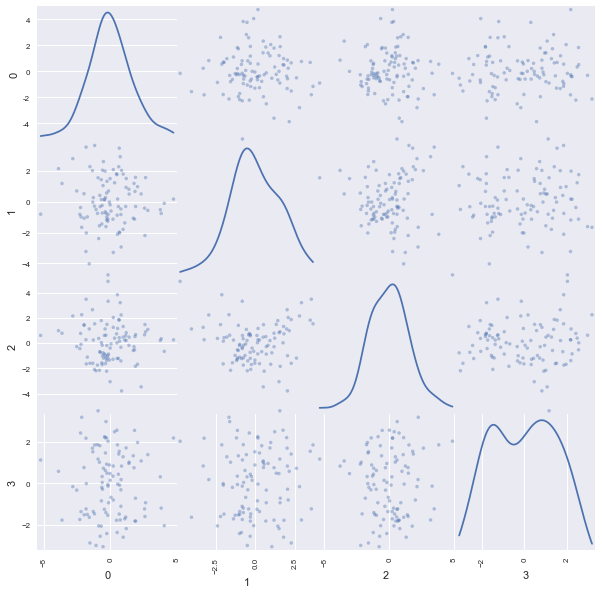

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0267,0.1049,0.9838,0.25858
1,0.0428,10.4768,0.9888,0.56824
2,0.1908,0.2896,0.9859,0.36511
3,0,0.1632,0.9663,0.01164


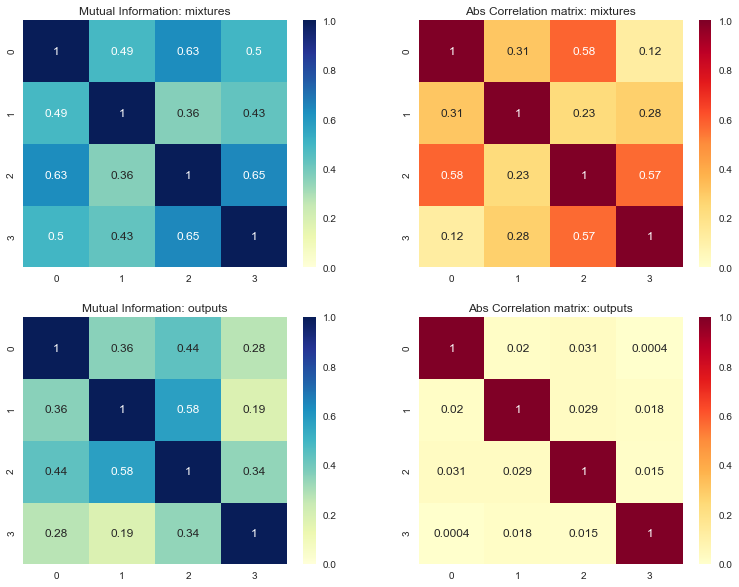

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1, decayRate = 1e-7, runs  = 1) 

Execution time: 0.01700615882873535 seconds


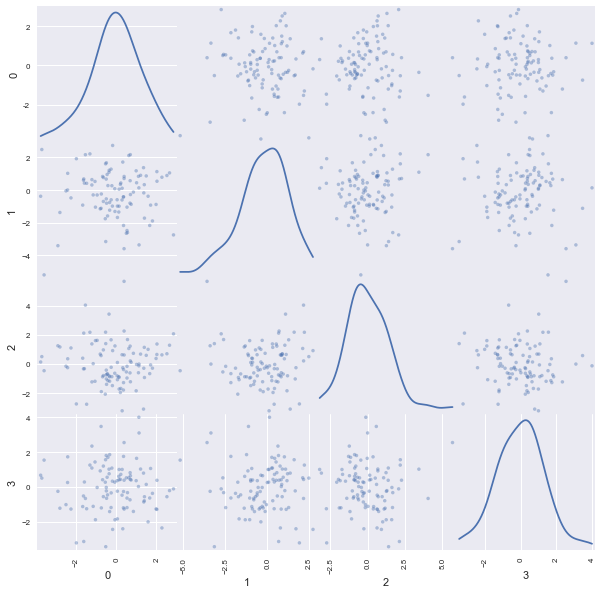

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.1928,0.9806,0.14932
1,0,0.1345,0.9747,0.050693
2,0.4309,0.4366,0.9664,0.011896
3,0.2397,0.0783,0.9883,0.5333


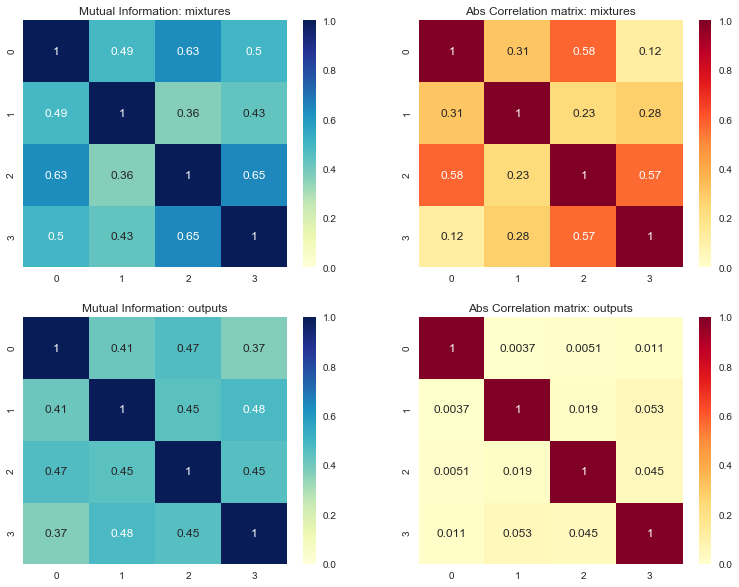

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-2, runs = 1)

Execution time: 0.017006635665893555 seconds


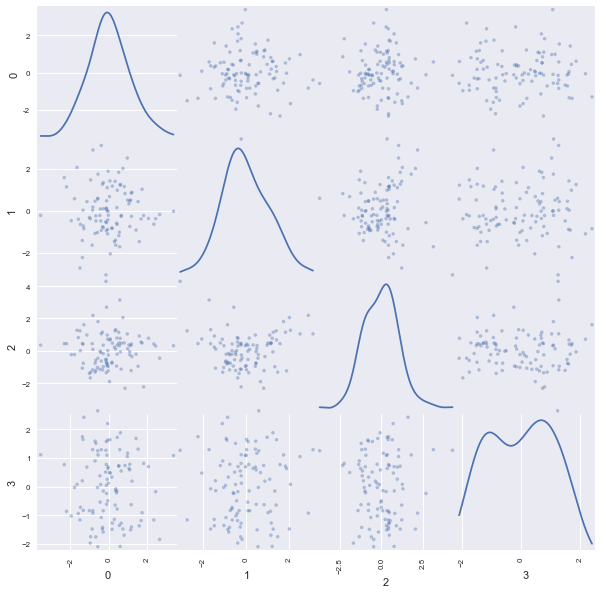

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1666,0.2936,0.9901,0.67214
1,0,0.1204,0.9893,0.60898
2,0.4428,0.3531,0.9678,0.015106
3,0,0.2001,0.964,0.0078192


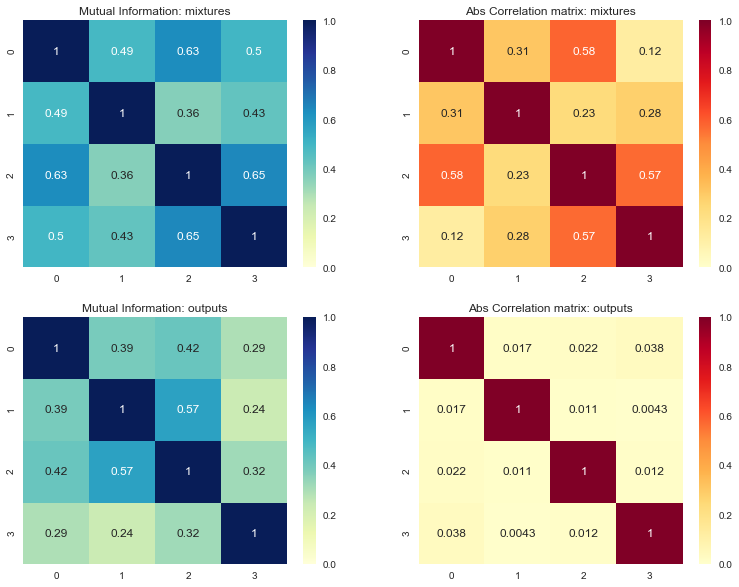

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

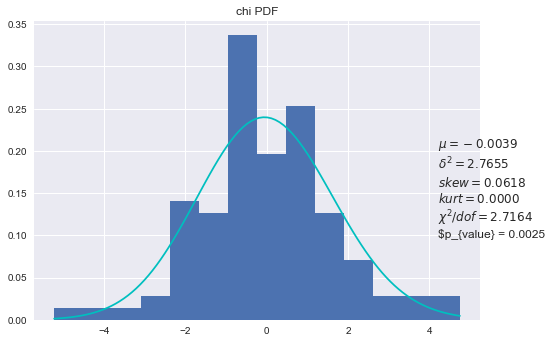

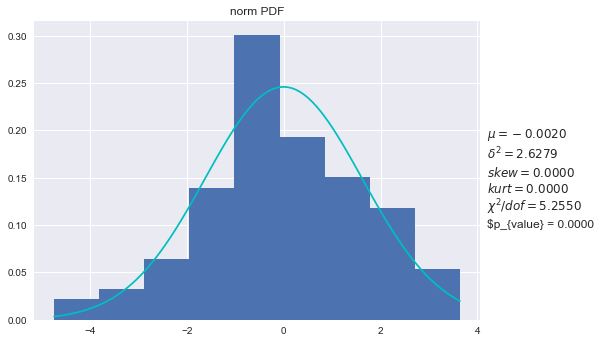

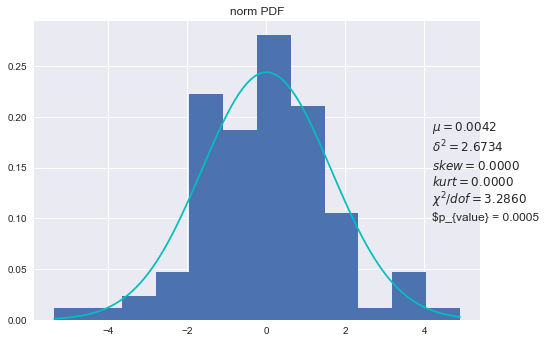

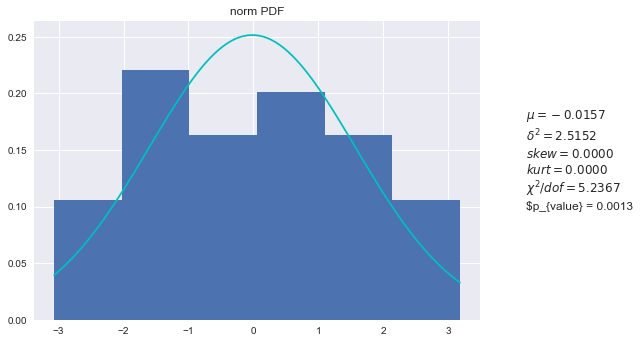

In [15]:
from evaluation import graph_fittedData
for i, y in enumerate(yNPCA):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedback network

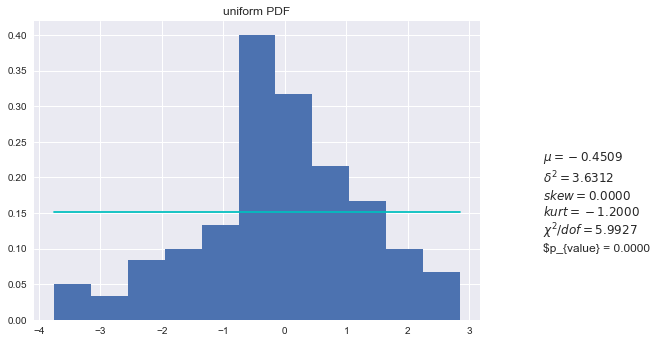

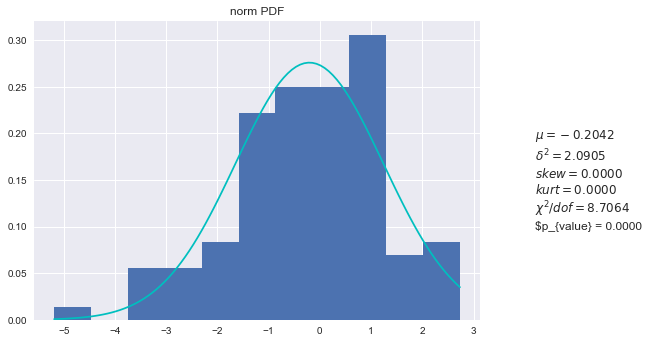

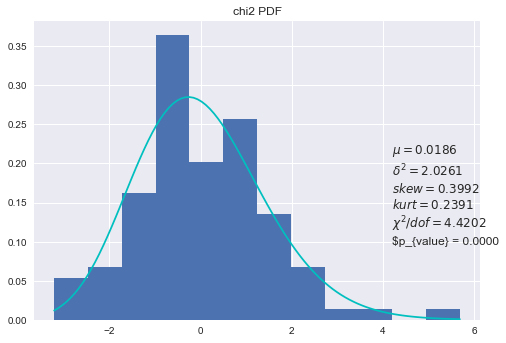

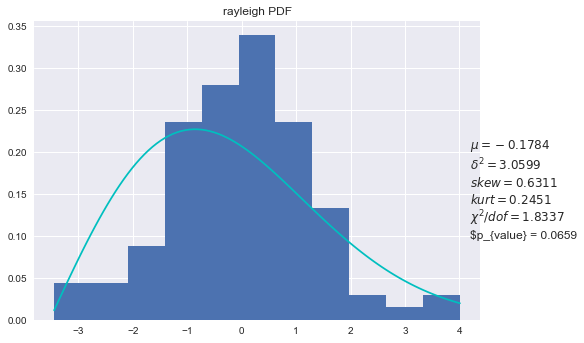

In [16]:
for i, y in enumerate(yFeedback):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedforward network

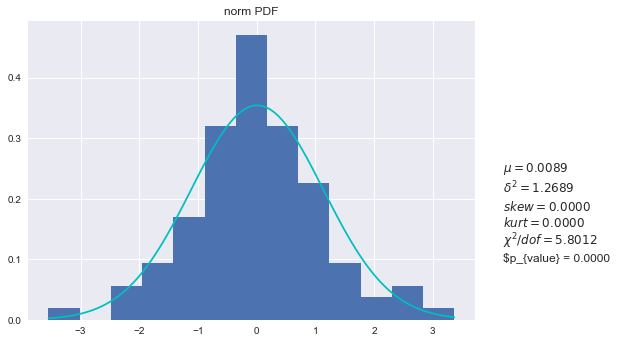

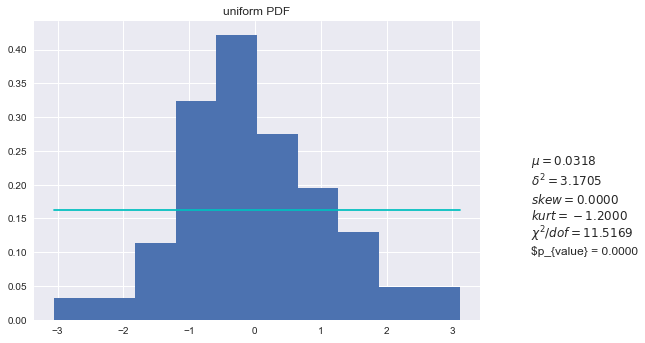

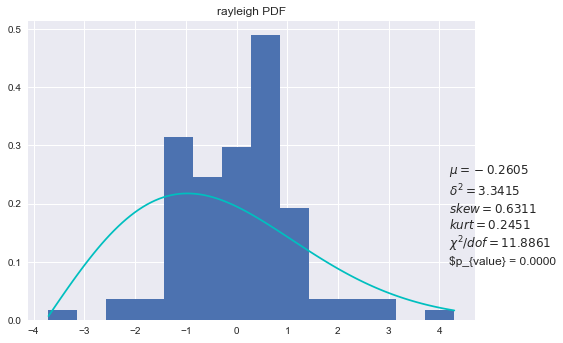

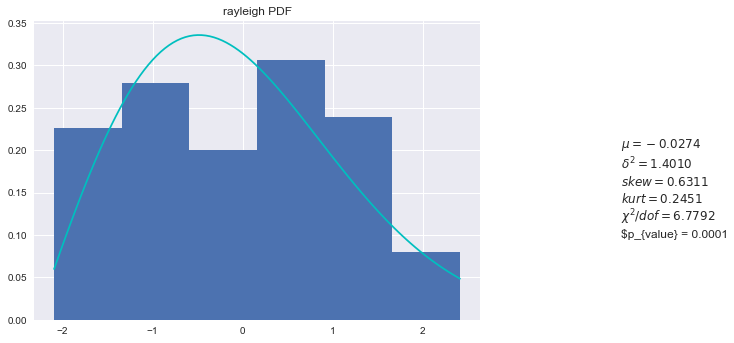

In [17]:
for i, y in enumerate(yFeedforward):
    graph_fittedData(y)

# Fontes conhecidas

In [18]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/SeventhSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(4, 100)


,0,1,2,3
0,-0.293662,5.338219,-0.450294,-1.638023
1,1.314015,-3.373279,1.739757,-5.132907
2,-5.573339,-1.736645,9.580465,-12.773851
3,-4.226771,19.799658,2.510886,0.988586
4,-0.834116,-8.201934,4.744578,-11.034271


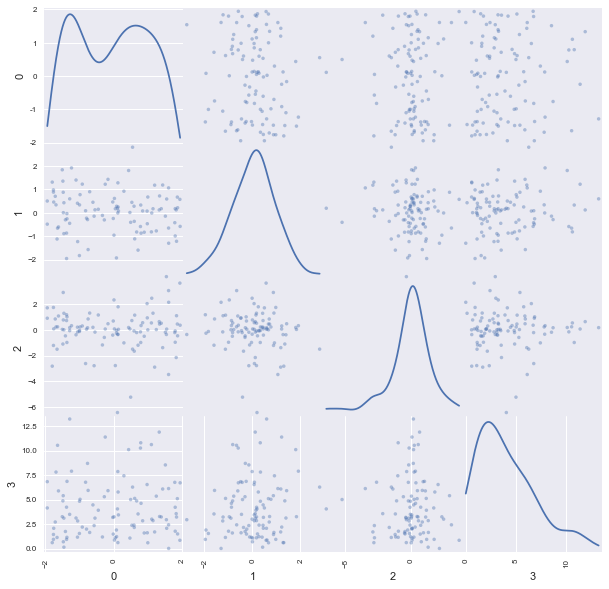

In [19]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(4, 100) (4, 100)
[[ 0.61256446  0.3872216   0.61275398  0.09969915]
 [ 0.06514616  0.098805    0.07122146  0.25125847]
 [ 0.47332803  0.30072728  0.52313995  0.46566233]
 [ 1.14090606  1.00313009  1.17945485  0.27882847]]


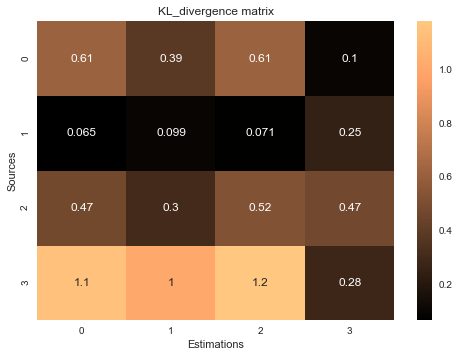

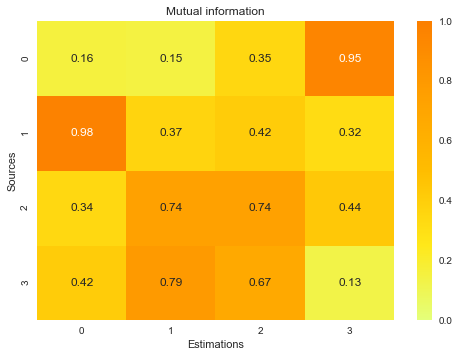

In [20]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(4, 100) (4, 100)
[[ 0.29146699  0.70960821  0.69011086  0.47488513]
 [ 0.12409152  1.00870184  0.6981491   0.04868858]
 [ 0.28325764  0.38888654  2.5508119   0.70594281]
 [ 0.7661898   1.33134098  0.45243592  0.67793118]]


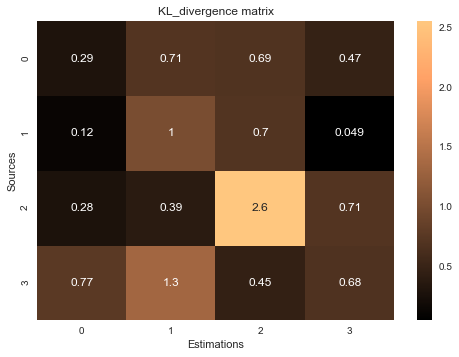

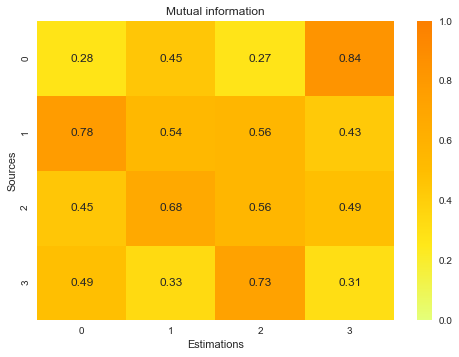

In [21]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(4, 100) (4, 100)
[[ 0.61387243  0.48999407  0.79538674  0.06465321]
 [ 0.73852372  0.06772896  0.7951927   0.25004691]
 [ 0.83355598  0.61870558  2.05801051  0.44835488]
 [ 1.14234755  0.81502688  1.16216163  0.1909975 ]]


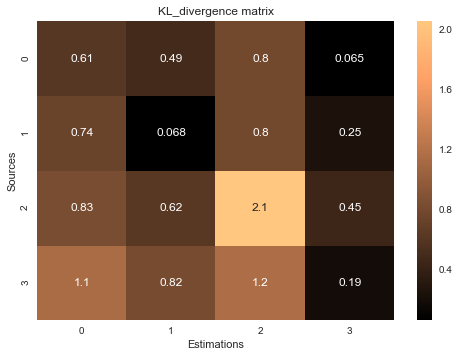

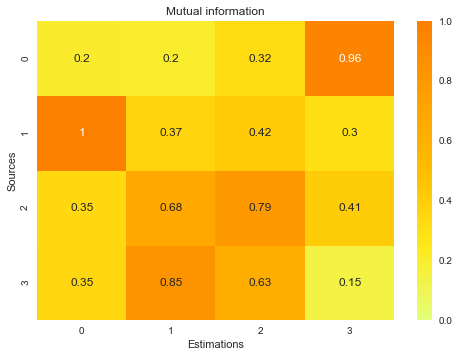

In [22]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)